In [1]:
import numpy as np
import pandas as pd
import glob

path = './'
documents = ['photos', 'keywords', 'collections', 'conversions', 'colors']
datasets = {}

for doc in documents:
    files = glob.glob(path + doc + ".tsv*")

    subsets = []
    for filename in files:
        df = pd.read_csv(filename, sep='\t', header=0)
        subsets.append(df)
    datasets[doc] = pd.concat(subsets, axis=0, ignore_index=True)

data_photos = datasets['photos'].to_numpy()
data_colors = datasets['colors'].to_numpy()

print(data_photos[0])

print(data_colors[0])

color_list = list(data_colors[:, 5])
color_list.sort()
uni_color_name, uni_color_count = np.unique(color_list, return_counts=True)

print(uni_color_name, uni_color_count)

## Describe every photos by color keyword vectors

In [8]:
photo_list = list(data_photos[:, 0])
photo_id = np.unique(photo_list)
photo_id.sort()
n_photo = len(photo_id)

color_list = list(data_colors[:, 5])
color_name = np.unique(color_list)
color_name.sort()
n_color = len(color_name)
n_entries_color = len(data_colors)
print(n_entries_color)

photo_by_color_vector = np.zeros((n_photo, n_color))
photo_by_color_vector.shape

for idx in range(n_entries_color):
#     print(data_colors[idx])
    curr_photo_id = data_colors[idx,0]
    curr_photo_color = data_colors[idx, 5]
    curr_photo_coverage = data_colors[idx, 6]
    loc_photo_id = np.where(photo_id == curr_photo_id)[0][0]
    loc_photo_color = np.where(color_name == curr_photo_color)[0][0]
    photo_by_color_vector[loc_photo_id, loc_photo_color] = curr_photo_coverage

245797


## t-SNE dim reduction

In [11]:
from sklearn.manifold import TSNE
photo_color_embedded = TSNE(n_components=2).fit_transform(photo_by_color_vector)
photo_color_embedded.shape

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6), dpi=150)

plt.scatter(photo_color_embedded[:,0], photo_color_embedded[:,1],
            s=1, alpha=0.5)

(25000, 2)

## Photo keywords

In [11]:
data_keywords = datasets['keywords'].to_numpy()
data_keywords[1:5]

array([['zzux2cH-F-A', 'compass', 26.8641052246094, nan, 'f'],
       ['zzux2cH-F-A', 'nature', 99.8379898071289, 95.9661185741425, 'f'],
       ['zzux2cH-F-A', 'jar', 43.1289024353027, nan, 'f'],
       ['zzux2cH-F-A', 'flower', 81.6354064941406, nan, 'f']],
      dtype=object)

In [12]:
data_keywords_90 = data_keywords[data_keywords[:, 2]>90]
keyword_list = list(data_keywords_90[:, 1])
keyword_hub, keyword_count = np.unique(keyword_list, return_counts=True)
keyword_hub.sort()
n_keywords = len(keyword_hub)
print(n_keywords)

1276


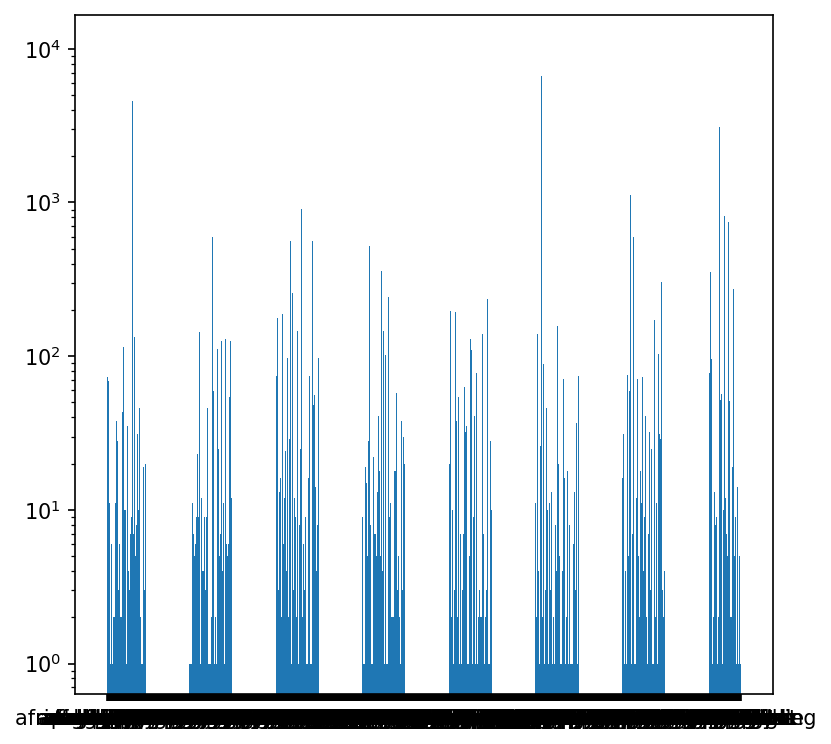

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6), dpi=150)

plt.bar(x=keyword_hub,height=keyword_count,width=0.5,align="center")
plt.yscale("log")

In [15]:
from scipy import stats
stats.describe(keyword_count)

DescribeResult(nobs=1276, minmax=(1, 10458), mean=99.45062695924764, variance=279987.86344274384, skewness=13.846514539382444, kurtosis=235.81496763598776)

In [16]:
np.quantile(keyword_count, 0.95)

359.25

In [17]:
keyword_count.sort()
keyword_count

array([    1,     1,     1, ...,  6623, 10043, 10458])

## Set each photo one label with top confidence

In [18]:
n_entries_keywords = len(data_keywords)
print(n_entries_keywords)
con_keywords = np.asarray(data_keywords[:, 2], dtype=np.float64)
print(np.sum(np.isnan(con_keywords)))
con_keywords[np.isnan(con_keywords)] = 0
print(np.amin(con_keywords))
print(np.amax(con_keywords))
print(np.sum(np.isnan(con_keywords)))

2672768
302259
0.0
100.0
0


In [19]:
data_keywords[:, 2] = con_keywords

In [20]:
photo_keyword = {}
hist_keyword = []
for ins_photo_id in photo_id:
#     print(ins_photo_id)
    id_keywords_list = data_keywords[data_keywords[:, 0] == ins_photo_id]
    id_keywords = id_keywords_list[:, 1]
    id_keywords_con = id_keywords_list[:, 2]
    idx_top_keyword = np.argmax(id_keywords_con)
    photo_keyword[ins_photo_id] = id_keywords_list[idx_top_keyword, 1]
    hist_keyword.append(id_keywords_list[idx_top_keyword, 1])
#     print(idx_top_keyword)
#     print(id_keywords_list)
#     print(id_keywords_list[idx_top_keyword, 1])

In [21]:
photo_keyword

{'--2IBUMom1I': 'human',
 '--6JlGcHl-w': 'plant',
 '--Jy_8mvs4E': 'droplet',
 '--SDX4KWIbA': 'rabbit',
 '--Tn3E5ZtfQ': 'flora',
 '--e3kJUMSZw': 'nature',
 '--kGuWTwn48': 'nature',
 '--lzOIJ-a4U': 'outdoors',
 '-0YZgPxq04k': 'plant',
 '-0_ww2ACIw8': 'tree',
 '-0eINgEiNw4': 'rug',
 '-12cgSu9HW0': 'vase',
 '-1a83VD65ss': 'plant',
 '-1lMrIXAn6Q': 'plant',
 '-1qb8SIBzKY': 'light',
 '-2ii0_ctxpQ': 'road',
 '-2loC3xzDF8': 'nature',
 '-2pFSIxX9ow': 'ground',
 '-3IZERJGsm4': 'soil',
 '-3LtGq_RPcY': 'mountain range',
 '-3cTY-Q6k88': 'plant',
 '-3l6KX8uCAM': 'nature',
 '-3qSsolbivo': 'tree',
 '-3uIUqsR-Rw': 'tree',
 '-43qvNitz5k': 'nature',
 '-4AR-vVjAbM': 'fish',
 '-4UwhAr4KYg': 'light',
 '-4WLn9giArE': 'tree',
 '-4qCLz3r1s8': 'animal',
 '-5WWw6DeQ8w': 'clothing',
 '-5_tGk7SUuM': 'fungus',
 '-5eZ1-Ie68w': 'plant',
 '-6-uqd2hMCg': 'cove',
 '-6HgkmXTWhs': 'water',
 '-6JK87e42iQ': 'landscape',
 '-6UNL6Ghn_c': 'mammal',
 '-6_jB6qjwCQ': 'sky',
 '-6e6HVEzgGs': 'blossom',
 '-6h-oYfdZDA': 'flora',
 '-6h

(array([19378.,  2854.,   914.,   655.,   328.,   275.,   239.,   143.,
          119.,    95.]),
 array([  0. ,  81.6, 163.2, 244.8, 326.4, 408. , 489.6, 571.2, 652.8,
        734.4, 816. ]),
 <a list of 10 Patch objects>)

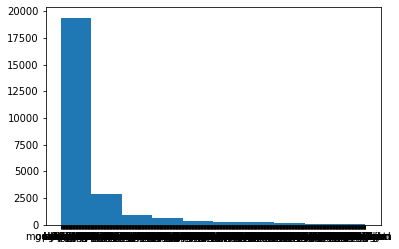

In [22]:
plt.hist(hist_keyword)

In [23]:
list_kw, count_kw = np.unique(hist_keyword, return_counts=True)

In [24]:
len(hist_keyword)

25000

In [25]:
top16_kw = list_kw[count_kw>200]

In [256]:
top16_kw

array(['animal', 'bird', 'flora', 'human', 'leaf', 'light', 'mammal',
       'mountain', 'nature', 'outdoors', 'person', 'pet', 'plant', 'soil',
       'tree', 'water'], dtype='<U19')

In [260]:
count_kw[count_kw>200]

array([1203,  324,  317,  500,  243,  223,  509,  385, 4769, 1436,  484,
        233, 3644,  396,  525,  851])

In [346]:
list_kw, count_kw = np.unique(hist_keyword, return_counts=True)
kw_th = 100
top_kw = list_kw[count_kw>kw_th]
top_kw = ['bird', 'flora', 'human', 'leaf', 'light', 'mountain']
# top_kw = list(list_kw[count_kw>400])
top_kw_cnt = []
print(len(top_kw))
print(top_kw)

for kw in top_kw:
    top_kw_cnt.append(count_kw[np.where(list_kw==kw)[0][0]])

print(top_kw_cnt)
top_kw_cnt = np.sum(top_kw_cnt)
print(top_kw_cnt)

6
['bird', 'flora', 'human', 'leaf', 'light', 'mountain']
[324, 317, 500, 243, 223, 385]
1992


In [326]:
def categorical_cmap(nc, nsc, cmap="tab10", continuous=False):
    if nc > plt.get_cmap(cmap).N:
        raise ValueError("Too many categories for colormap.")
    if continuous:
        ccolors = plt.get_cmap(cmap)(np.linspace(0,1,nc))
    else:
        ccolors = plt.get_cmap(cmap)(np.arange(nc, dtype=int))
    cols = np.zeros((nc*nsc, 3))
    for i, c in enumerate(ccolors):
        chsv = matplotlib.colors.rgb_to_hsv(c[:3])
        arhsv = np.tile(chsv,nsc).reshape(nsc,3)
        arhsv[:,1] = np.linspace(chsv[1],0.25,nsc)
        arhsv[:,2] = np.linspace(chsv[2],1,nsc)
        rgb = matplotlib.colors.hsv_to_rgb(arhsv)
        cols[i*nsc:(i+1)*nsc,:] = rgb       
    cmap = matplotlib.colors.ListedColormap(cols)
    return cmap

In [327]:
from matplotlib import cm
import matplotlib

tab10_cm = categorical_cmap(10, 1, cmap="tab10", continuous=False)
cm_embedded = tab10_cm(np.linspace(0, 1, num=10))[:len(top_kw)]
# cm_embedded = plt.cm.hsv(np.linspace(0, 1, num=len(top_kw)))
tsne_color = np.zeros((top_kw_cnt, 4))
tsne_data = np.zeros((top_kw_cnt, n_color))
tsne_type = np.zeros((top_kw_cnt))
kw_cnt = 0

for idx in range(n_photo): # 
    curr_kw = photo_keyword[photo_id[idx]]
    if curr_kw in top_kw:
        curr_idx =top_kw.index(curr_kw)
        curr_color = cm_embedded[curr_idx, :]
        tsne_color[kw_cnt, :] = curr_color
        tsne_data[kw_cnt, :] = photo_by_color_vector[idx, :]
        tsne_type[kw_cnt] = curr_idx
        kw_cnt += 1

In [328]:
import copy

bi_tsne_data = copy.deepcopy(tsne_data)
# bi_tsne_data[bi_tsne_data>0.5] = 1
# bi_tsne_data[bi_tsne_data<=0.5] = 0
# bi_tsne_data[bi_tsne_data > 0] = 1

In [329]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca_result_50 = PCA(n_components=10).fit_transform(bi_tsne_data)

In [330]:
def plot_tSNE(perplexity=10):
    photo_color_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(pca_result_50)
    photo_color_embedded.shape

    plt.figure(figsize=(6,6), dpi=150)
    plot_hub = []
    
    for idx in range(len(top_kw)):
        data = photo_color_embedded[tsne_type == idx]
        color = tsne_color[tsne_type == idx]
#         print(data.shape)
        
        pltX = plt.scatter(data[:,0], data[:,1],s=5, alpha=0.7, c=color, label=top_kw[idx])
        plot_hub.append(pltX)
    plt.title("perplexity="+str(perplexity))
#     plt.legend((plot_hub), (top_kw))
    plt.legend()

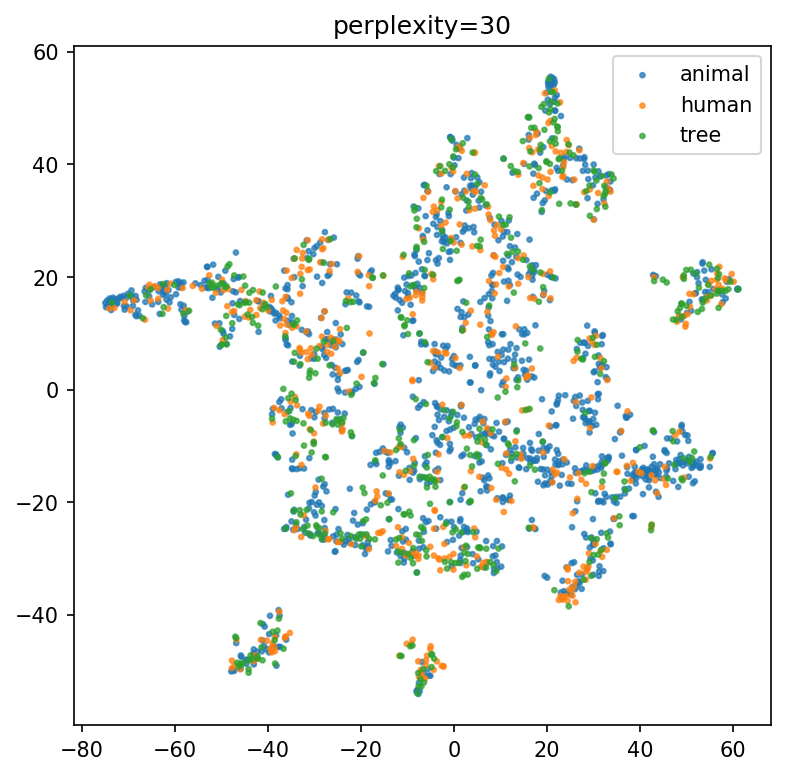

In [331]:
plot_tSNE(perplexity=30)

## Plot figures

In [343]:
list_kw[count_kw>200]

array(['animal', 'bird', 'flora', 'human', 'leaf', 'light', 'mammal',
       'mountain', 'nature', 'outdoors', 'person', 'pet', 'plant', 'soil',
       'tree', 'water'], dtype='<U19')

In [ ]:
['bird', 'flora', 'human', 'leaf', 'light', 'mountain', 'person', 'pet', 'tree']

In [341]:
count_kw[count_kw>200]

array([1203,  324,  317,  500,  243,  223,  509,  385, 4769, 1436,  484,
        233, 3644,  396,  525,  851])

In [347]:
import itertools

kw_hub = ['bird', 'flora', 'human', 'leaf', 'light', 'mountain']
kw_comb = list(itertools.combinations(kw_hub, 3))
print(kw_comb)

[('bird', 'flora', 'human'), ('bird', 'flora', 'leaf'), ('bird', 'flora', 'light'), ('bird', 'flora', 'mountain'), ('bird', 'human', 'leaf'), ('bird', 'human', 'light'), ('bird', 'human', 'mountain'), ('bird', 'leaf', 'light'), ('bird', 'leaf', 'mountain'), ('bird', 'light', 'mountain'), ('flora', 'human', 'leaf'), ('flora', 'human', 'light'), ('flora', 'human', 'mountain'), ('flora', 'leaf', 'light'), ('flora', 'leaf', 'mountain'), ('flora', 'light', 'mountain'), ('human', 'leaf', 'light'), ('human', 'leaf', 'mountain'), ('human', 'light', 'mountain'), ('leaf', 'light', 'mountain')]


In [352]:
tab10_cm = categorical_cmap(10, 1, cmap="tab10", continuous=False)
cm_embedded = tab10_cm(np.linspace(0, 1, num=10))[:len(top_kw)]

In [358]:
perplexity = 100
for kw_ins in list(itertools.combinations(kw_hub, 3)):
    list_kw, count_kw = np.unique(hist_keyword, return_counts=True)
    top_kw = list(kw_ins)
    top_kw_cnt = []
    for kw in top_kw:
        top_kw_cnt.append(count_kw[np.where(list_kw==kw)[0][0]])

    top_kw_cnt = np.sum(top_kw_cnt)
    tsne_color = np.zeros((top_kw_cnt, 4))
    tsne_data = np.zeros((top_kw_cnt, n_color))
    tsne_type = np.zeros((top_kw_cnt))
    kw_cnt = 0

    for idx in range(n_photo): # 
        curr_kw = photo_keyword[photo_id[idx]]
        if curr_kw in top_kw:
            curr_idx =top_kw.index(curr_kw)
            curr_color = cm_embedded[curr_idx, :]
            tsne_color[kw_cnt, :] = curr_color
            tsne_data[kw_cnt, :] = photo_by_color_vector[idx, :]
            tsne_type[kw_cnt] = curr_idx
            kw_cnt += 1

    pca_result_50 = PCA(n_components=10).fit_transform(tsne_data)
    photo_color_embedded = TSNE(n_components=2, perplexity=perplexity).fit_transform(pca_result_50)
    photo_color_embedded.shape

    plt.figure(figsize=(6,6), dpi=150)
    plot_hub = []

    for idx in range(len(top_kw)):
        data = photo_color_embedded[tsne_type == idx]
        color = tsne_color[tsne_type == idx]
    #         print(data.shape)

        pltX = plt.scatter(data[:,0], data[:,1],s=5, alpha=0.7, c=color, label=top_kw[idx])
        plot_hub.append(pltX)
    plt.title("Low dim of "+"+".join(top_kw))
    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.savefig("./idyll/"+"_".join(top_kw)+"_"+str(perplexity)+".png")
    plt.close()

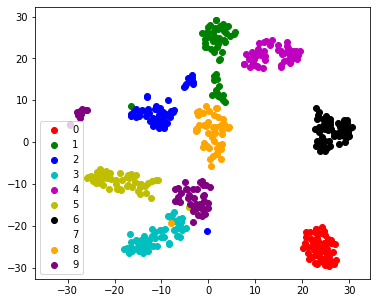

In [230]:
"""
==========================
tSNE to visualize digits
==========================

Here we use :class:`sklearn.manifold.TSNE` to visualize the digits
datasets. Indeed, the digits are vectors in a 8*8 = 64 dimensional space.
We want to project them in 2D for visualization. tSNE is often a good
solution, as it groups and separates data points based on their local
relationship.

"""

############################################################
# Load the iris data
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

############################################################
# Fit and transform with a TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

############################################################
# Project the data in 2D
X_2d = tsne.fit_transform(X)

############################################################
# Visualize the data
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()


## Download thumb

In [31]:
data_photos[idx][0]

'TK1z7nRT6aE'

In [40]:
def download_A_to_B(start, end, tag='_0'):
    MAX_SIZE = (100, 100)
    arbitary_large_limit = 89478485

    for idx in range(end-start):
        idx += start
        img_url = data_photos[idx, 2]
        img_data = requests.get(img_url).content
        with open('download_temp'+tag+'.jpg', 'wb') as handler:
            handler.write(img_data)
        try:
            image = Image.open('download_temp'+tag+'.jpg')
            try:
                image.thumbnail(MAX_SIZE) 
                image.save("./thumbnail/"+data_photos[idx][0]+".png")
            except:
                print(data_photos[idx][0])
        except:
            print(data_photos[idx][0])

        if np.mod(idx, 20) == 0:
            print("tag:", idx)

In [54]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

import PIL.Image as Image
import requests
import threading
import multiprocessing

shift = 6320
n_download = 10

tx_list = []
for idx in range(multiprocessing.cpu_count()):
    print(idx*n_download+shift, (idx+1)*n_download+shift)
    tx_list.append(threading.Thread(
        target=download_A_to_B, args=(idx*n_download+shift, (idx+1)*n_download+shift, str(idx))))
print("----------------------------------")
for tx in tx_list:
    tx.start()
    
for tx in tx_list:
    tx.join()

print("Done!") 

6320 6330
6330 6340
6340 6350
6350 6360
6360 6370
6370 6380
6380 6390
6390 6400
----------------------------------
tag: 6360
tag: 6380
tag: 6320
tag: 6340
Done!
